#### Cai 2020 abridged QC

**Objective**: Run QC steps without normalisation/UMAP for Cai 2020 data

- **Developed by**: Mairi McClean
- **Affiliation**: Institute of Computational Biology, Helmholtz Zentrum Munich
- **v230306**

### Import required modules

In [33]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scrublet as scr
import matplotlib.pyplot as plt
import pybiomart as biomart
from scipy.stats import median_abs_deviation
from matplotlib import colors
from matplotlib import rcParams

#### Log file and figure output settings

In [34]:
%matplotlib inline
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.9.1
scanpy      1.9.3
-----
CoreFoundation      NA
Foundation          NA
PIL                 9.5.0
PyObjCTools         NA
anyio               NA
appnope             0.1.3
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
certifi             2023.05.07
cffi                1.15.1
charset_normalizer  3.1.0
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.5.1
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
future              0.18.3
h5py                3.8.0
idna                3.4
igraph              0.10.4
importlib_resources NA
ipykernel           6.23.1
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonschema          4.17.3
j

### Read in datasets

In [35]:
# adata = sc.read_h5ad('/Volumes/Expansion/data_lake/INBOX/tb_cc/raw_data_objects/single_cell/human/cai2020/CaiY2020_PBMC_TB.raw.h5ad')

adata = sc.read_h5ad('/Users/mairi.mcclean/example_data_lake/INBOX/tb_cc/raw_data_objects/human/cai2020/CaiY2020_PBMC_TB.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 3701271 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch'
    var: 'gene_name'

In [36]:
adata.var

gene_name
gene_id                       
ENSG00000223972.5      DDX11L1
ENSG00000227232.5       WASH7P
ENSG00000278267.1    MIR6859-1
ENSG00000243485.5  MIR1302-2HG
ENSG00000284332.1    MIR1302-2
...                        ...
ENSG00000198695.2       MT-ND6
ENSG00000210194.1        MT-TE
ENSG00000198727.2       MT-CYB
ENSG00000210195.2        MT-TT
ENSG00000210196.2        MT-TP

[61533 rows x 1 columns]

In [37]:
adata.obs

study    individual     sample tissue  \
barcode                                                             
AAACCTGAGAAACGAG-acTB3  CaiY_2021  SAMN14048025  PBMC_TB_3   PBMC   
AAACCTGAGAAACGCC-acTB3  CaiY_2021  SAMN14048025  PBMC_TB_3   PBMC   
AAACCTGAGAACAACT-acTB3  CaiY_2021  SAMN14048025  PBMC_TB_3   PBMC   
AAACCTGAGAACAATC-acTB3  CaiY_2021  SAMN14048025  PBMC_TB_3   PBMC   
AAACCTGAGAACTGTA-acTB3  CaiY_2021  SAMN14048025  PBMC_TB_3   PBMC   
...                           ...           ...        ...    ...   
TTTGTCATCTTGTTTG-H1     CaiY_2021  SAMN14048019  PBMC_HC_1   PBMC   
TTTGTCATCTTTACAC-H1     CaiY_2021  SAMN14048019  PBMC_HC_1   PBMC   
TTTGTCATCTTTACGT-H1     CaiY_2021  SAMN14048019  PBMC_HC_1   PBMC   
TTTGTCATCTTTAGGG-H1     CaiY_2021  SAMN14048019  PBMC_HC_1   PBMC   
TTTGTCATCTTTAGTC-H1     CaiY_2021  SAMN14048019  PBMC_HC_1   PBMC   

                               donor age gender     status data_type  \
barcode                                                                
AAACCTGAGAAACGAG-acTB3  SAMN14048025  34   male  active_TB  scRNAseq   
AAACCTGAGAAACGCC-acTB3  SAMN14048025  34   male  active_TB  scRNAseq   
AAACCTGAGAACAACT-acTB3  SAMN14048025  34   male  active_TB  scRNAseq   
AAACCTGAGAACAATC-acTB3  SAMN14048025  34   male  active_TB  scRNAseq   
AAACCTGAGAACTGTA-acTB3  SAMN14048025  34   male  active_TB  scRNAseq   
...                              ...  ..    ...        ...       ...   
TTTGTCATCTTGTTTG-H1     SAMN14048019  26   male    Healthy  scRNAseq   
TTTGTCATCTTTACAC-H1     SAMN14048019  26   male    Healthy  scRNAseq   
TTTGTCATCTTTACGT-H1     SAMN14048019  26   male    Healthy  scRNAseq   
TTTGTCATCTTTAGGG-H1     SAMN14048019  26   male    Healthy  scRNAseq   
TTTGTCATCTTTAGTC-H1     SAMN14048019  26   male    Healthy  scRNAseq   

                                     centre version  batch  
barcode                                                     
AAACCTGAGAAACGAG-acTB3  Shenzhen University   10XV2  acTB3  
AAACCTGAGAAACGCC-acTB3  Shenzhen University   10XV2  acTB3  
AAACCTGAGAACAACT-acTB3  Shenzhen University   10XV2  acTB3  
AAACCTGAGAACAATC-acTB3  Shenzhen University   10XV2  acTB3  
AAACCTGAGAACTGTA-acTB3  Shenzhen University   10XV2  acTB3  
...                                     ...     ...    ...  
TTTGTCATCTTGTTTG-H1     Shenzhen University   10XV2     H1  
TTTGTCATCTTTACAC-H1     Shenzhen University   10XV2     H1  
TTTGTCATCTTTACGT-H1     Shenzhen University   10XV2     H1  
TTTGTCATCTTTAGGG-H1     Shenzhen University   10XV2     H1  
TTTGTCATCTTTAGTC-H1     Shenzhen University   10XV2     H1  

[3701271 rows x 12 columns]

In [38]:
# checks the number of molecules counted per barcode(?), using "donor" as proxy(?)
adata.obs['donor'].value_counts()

donor
SAMN14048024    619020
SAMN14048021    551750
SAMN14048022    531457
SAMN14048020    524019
SAMN14048019    519223
SAMN14048023    490097
SAMN14048025    465705
Name: count, dtype: int64

In [39]:
# check omics mode
adata.obs['data_type'].value_counts

<bound method IndexOpsMixin.value_counts of barcode
AAACCTGAGAAACGAG-acTB3    scRNAseq
AAACCTGAGAAACGCC-acTB3    scRNAseq
AAACCTGAGAACAACT-acTB3    scRNAseq
AAACCTGAGAACAATC-acTB3    scRNAseq
AAACCTGAGAACTGTA-acTB3    scRNAseq
                            ...   
TTTGTCATCTTGTTTG-H1       scRNAseq
TTTGTCATCTTTACAC-H1       scRNAseq
TTTGTCATCTTTACGT-H1       scRNAseq
TTTGTCATCTTTAGGG-H1       scRNAseq
TTTGTCATCTTTAGTC-H1       scRNAseq
Name: data_type, Length: 3701271, dtype: category
Categories (1, object): ['scRNAseq']>

In [40]:
# Make names unique to avoid computational issues re repeated gene names
adata.var_names_make_unique()
sample_object = adata.copy()
sample_object

AnnData object with n_obs × n_vars = 3701271 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch'
    var: 'gene_name'

### Replace gene symbols
#### Performed to ensure that index concatenation is smoother

In [41]:
sample_object.var['gene_id'] = sample_object.var.index.copy()
sample_object.var.set_index('gene_name', inplace = True)
sample_object.var.head()

gene_id
gene_name                     
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1

In [42]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()

/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


### Top 20 scatterplot

normalizing counts per cell


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:01)


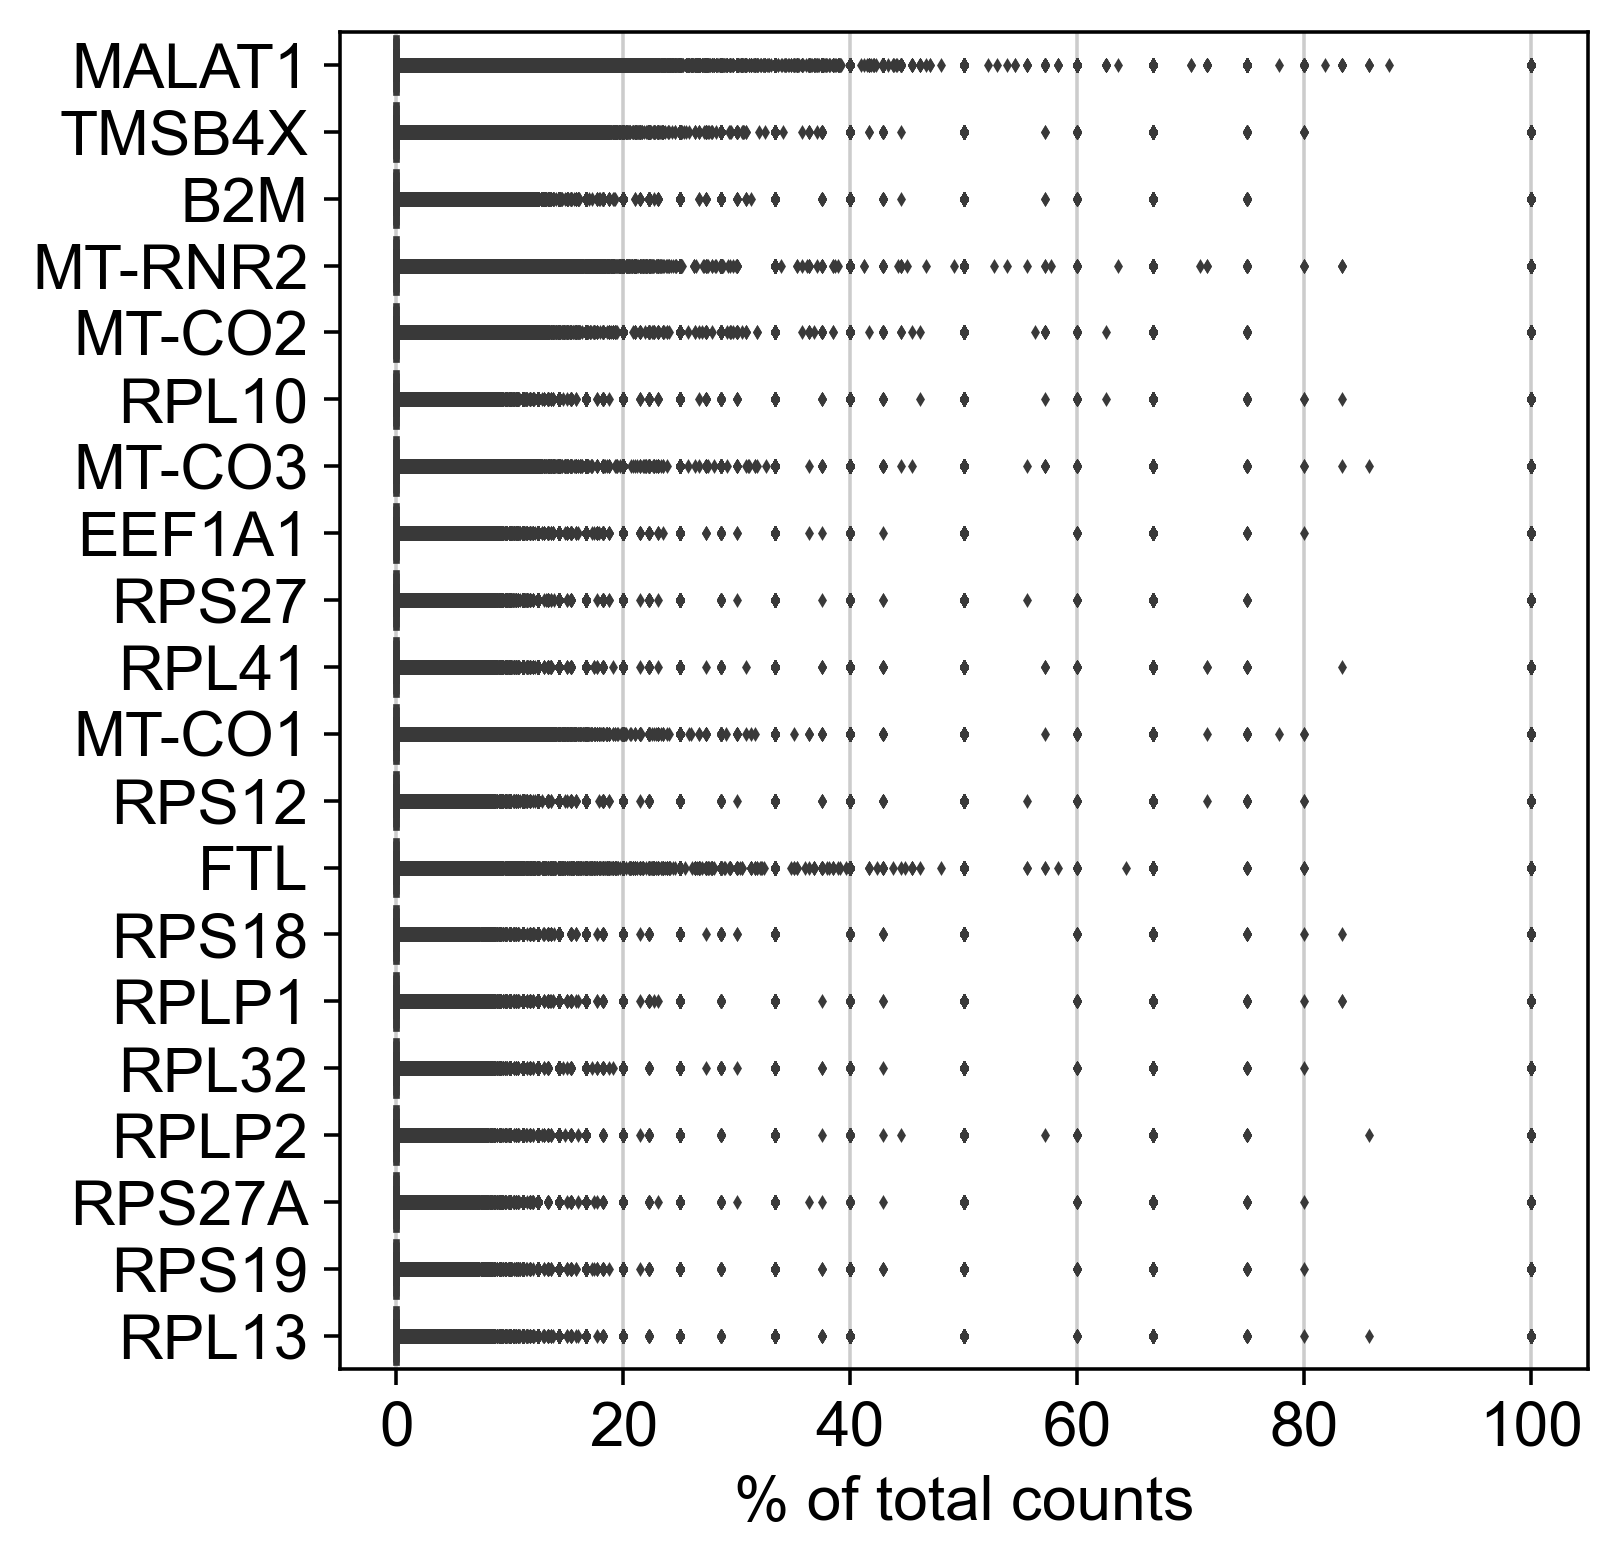

In [43]:
sc.pl.highest_expr_genes(sample_object, n_top=20)

### Initial filtering

In [44]:
# By genes
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 3628125 cells that have less than 200 genes expressed
73146 61533


In [45]:
# By cells
sc.pp.filter_genes(sample_object, min_cells = 3)
sample_object.shape

filtered out 25494 genes that are detected in less than 3 cells


(73146, 36039)

### QC metrics

In [46]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT-')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var["hb"] = sample_object.var_names.str.contains(("^HB[^(P)]"))
sample_object.var

gene_id  n_cells     mt   ribo     hb
DDX11L1          ENSG00000223972.5        6  False  False  False
ENSG00000238009  ENSG00000238009.6       87  False  False  False
CICP27           ENSG00000233750.3      203  False  False  False
ENSG00000268903  ENSG00000268903.1       78  False  False  False
ENSG00000241860  ENSG00000241860.7     2299  False  False  False
...                            ...      ...    ...    ...    ...
MT-ND6           ENSG00000198695.2    10818   True  False  False
MT-TE            ENSG00000210194.1      626   True  False  False
MT-CYB           ENSG00000198727.2    70927   True  False  False
MT-TT            ENSG00000210195.2      228   True  False  False
MT-TP            ENSG00000210196.2      407   True  False  False

[36039 rows x 5 columns]

- Check values present in new columns

In [47]:
sample_object.var['mt'].value_counts()

mt
False    36002
True        37
Name: count, dtype: int64

In [48]:
sample_object.var['ribo'].value_counts()

ribo
False    35123
True       916
Name: count, dtype: int64

In [49]:
sample_object.var['hb'].value_counts()

hb
False    36027
True        12
Name: count, dtype: int64

In [50]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo', 'hb'], percent_top = None, log1p = False, inplace = True)
sample_object

AnnData object with n_obs × n_vars = 73146 × 36039
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [51]:
sample_object

AnnData object with n_obs × n_vars = 73146 × 36039
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### QC visualisation

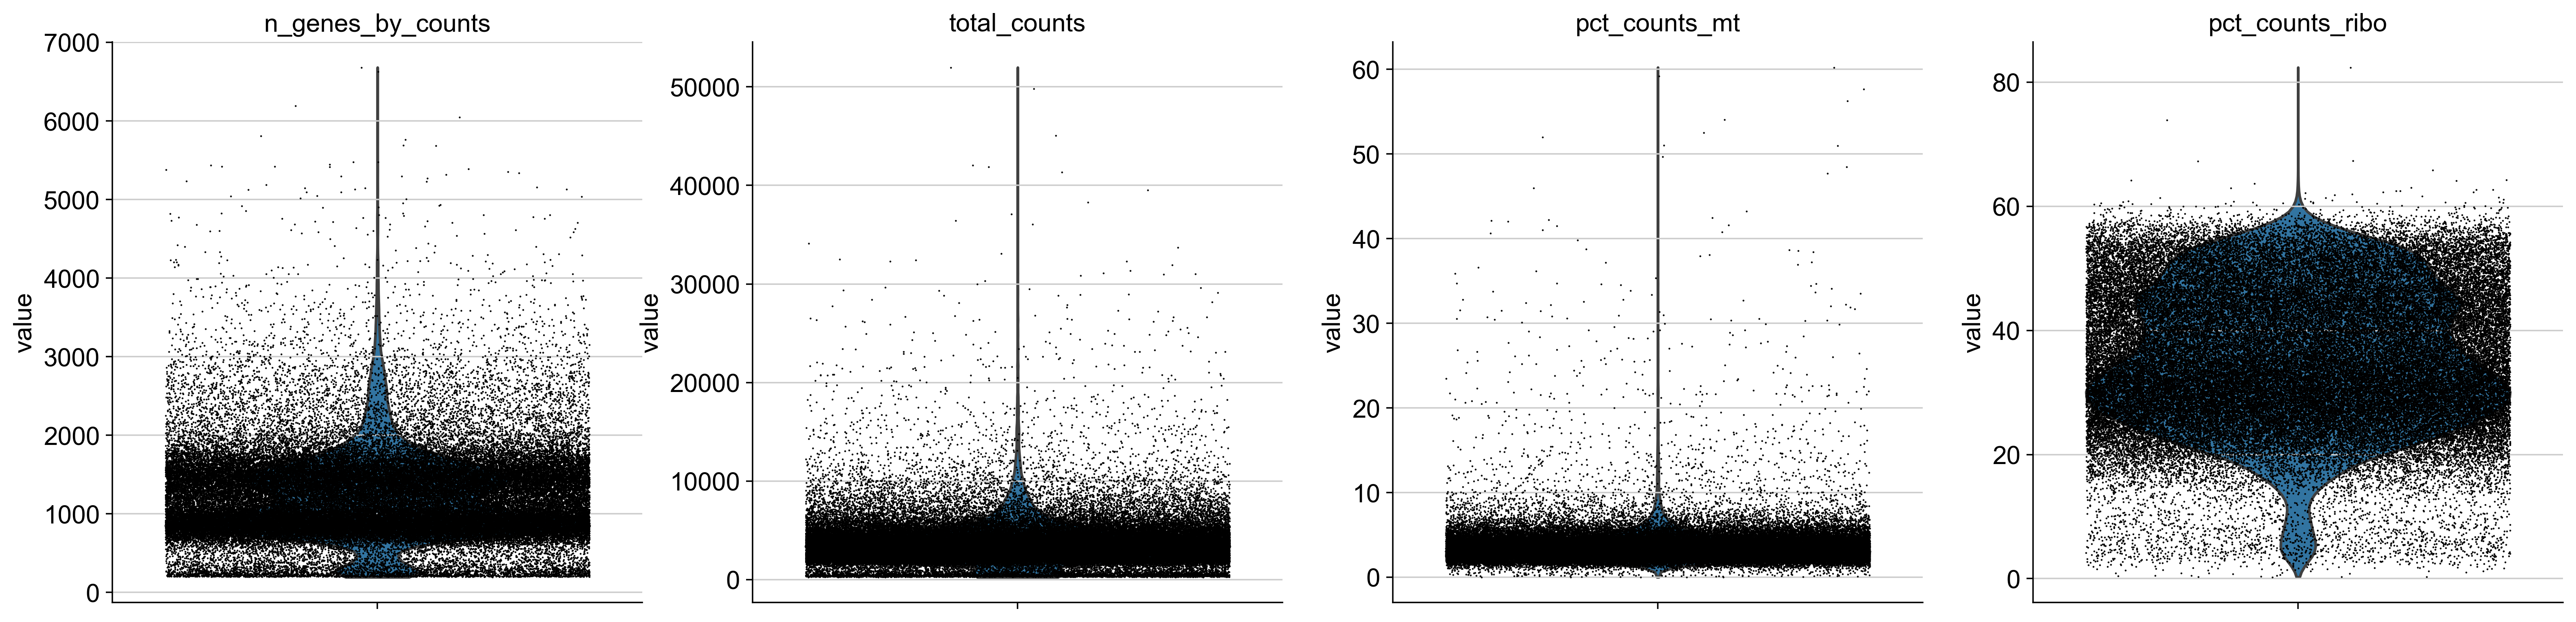

In [52]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

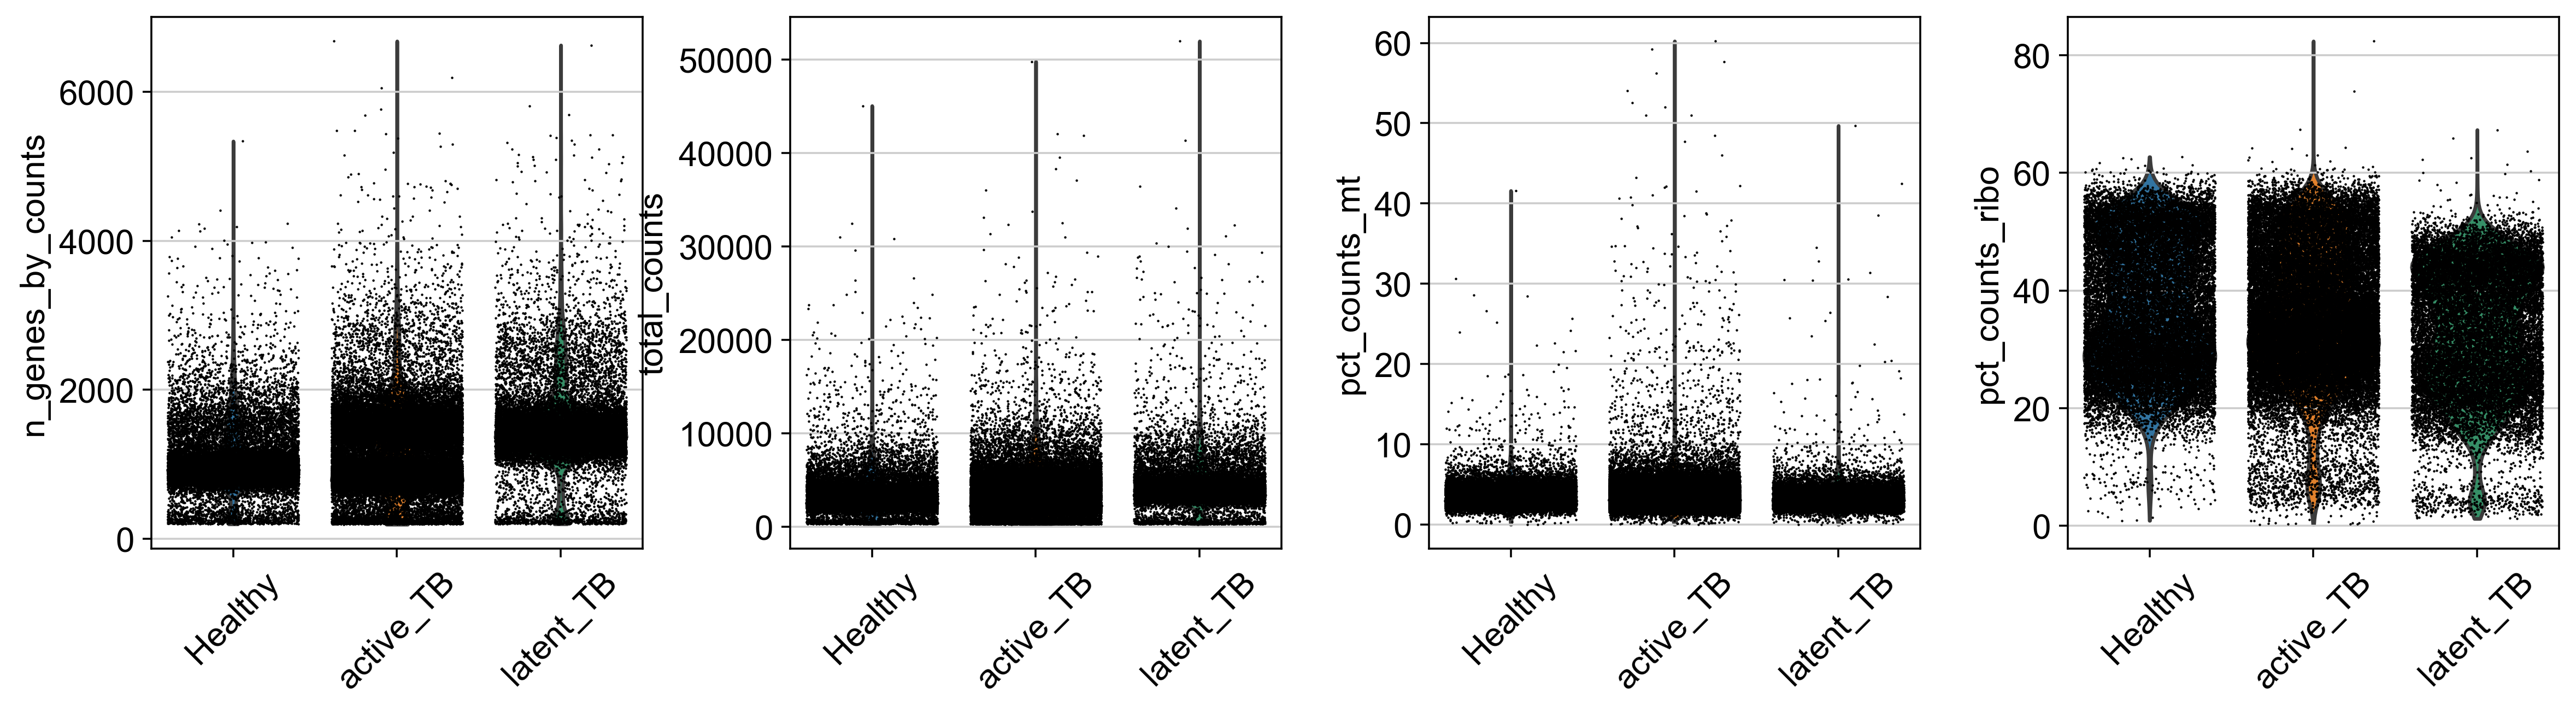

In [53]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter=0.4, groupby = 'status', rotation = 45)

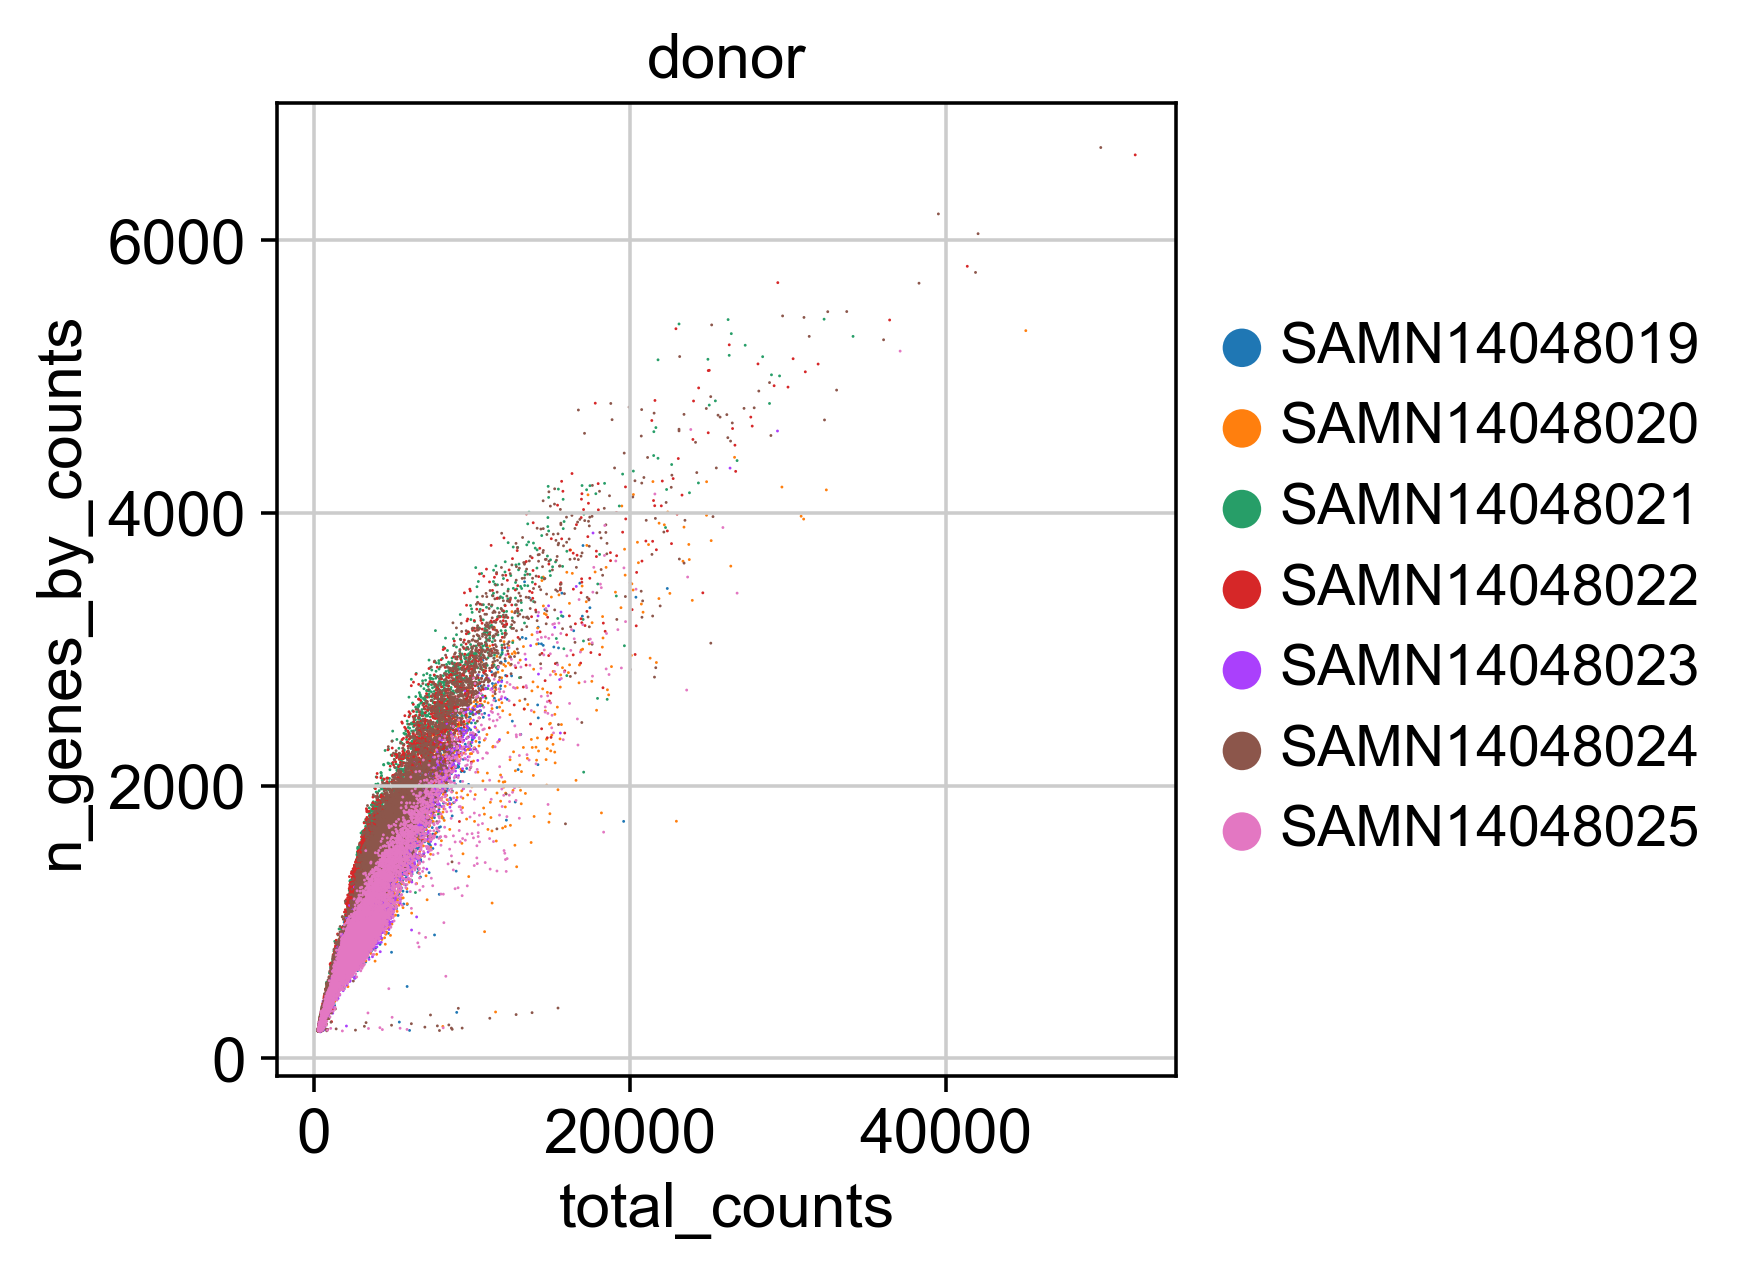

In [54]:
sc.pl.scatter(sample_object, x='total_counts', y='n_genes_by_counts', color = "donor")

### Add sample sex covariate

In [55]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [56]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                  
MT-TF               ENSG00000210049             577           647   
MT-RNR1             ENSG00000211459             648          1601   
MT-TV               ENSG00000210077            1602          1670   
MT-RNR2             ENSG00000210082            1671          3229   
MT-TL1              ENSG00000209082            3230          3304   

                   chromosome_name  
external_gene_name                  
MT-TF                           MT  
MT-RNR1                         MT  
MT-TV                           MT  
MT-RNR2                         MT  
MT-TL1                          MT

- Y chrom

In [57]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['Metazoa_SRP', 'XGY2', 'RPS4Y1', 'HSFY3P', 'NAP1L1P2', 'ZFY', 'ZFY-AS1',
       'LINC00278', 'PCDH11Y', 'RPL26P37', 'FAM197Y9', 'SRIP3', 'PRKY',
       'RN7SKP282', 'RFTN1P1', 'ZNF736P9Y', 'LINC00279', 'TTTY18', 'USP9YP4',
       'RBMY2QP', 'GYG2P1', 'RPS24P1', 'RN7SL702P', 'USP9Y', 'CDY4P', 'DDX3Y',
       'UTY', 'PSMA6P1', 'TMSB4Y', 'ANOS2P', 'NLGN4Y', 'NLGN4Y-AS1', 'FAM224B',
       'TTTY14', 'ZNF839P1', 'BCORP1', 'TXLNGY', 'KDM5D', 'TTTY10', 'EIF1AY',
       'RPS4Y2', 'NEFLP1', 'PRORY', 'USP9YP3', 'RBMY2FP', 'CYCSP48'],
      dtype='object')

In [58]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

- X chrom

In [59]:
chrX_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "X"])
chrX_genes

Index(['Metazoa_SRP', 'XG', 'GYG2', 'ARSD', 'ARSD-AS1', 'ARSL', 'ARSF',
       'RN7SL578P', 'RPS24P21', 'LINC01546',
       ...
       'CMC4', 'MTCP1', 'BRCC3', 'VBP1', 'RAB39B', 'CLIC2', 'TWF1P2',
       'TMLHE-AS1', 'TMLHE', 'SPRY3'],
      dtype='object', length=872)

In [60]:
sample_object.obs['percent_chrX'] = np.sum(
    sample_object[:, chrX_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

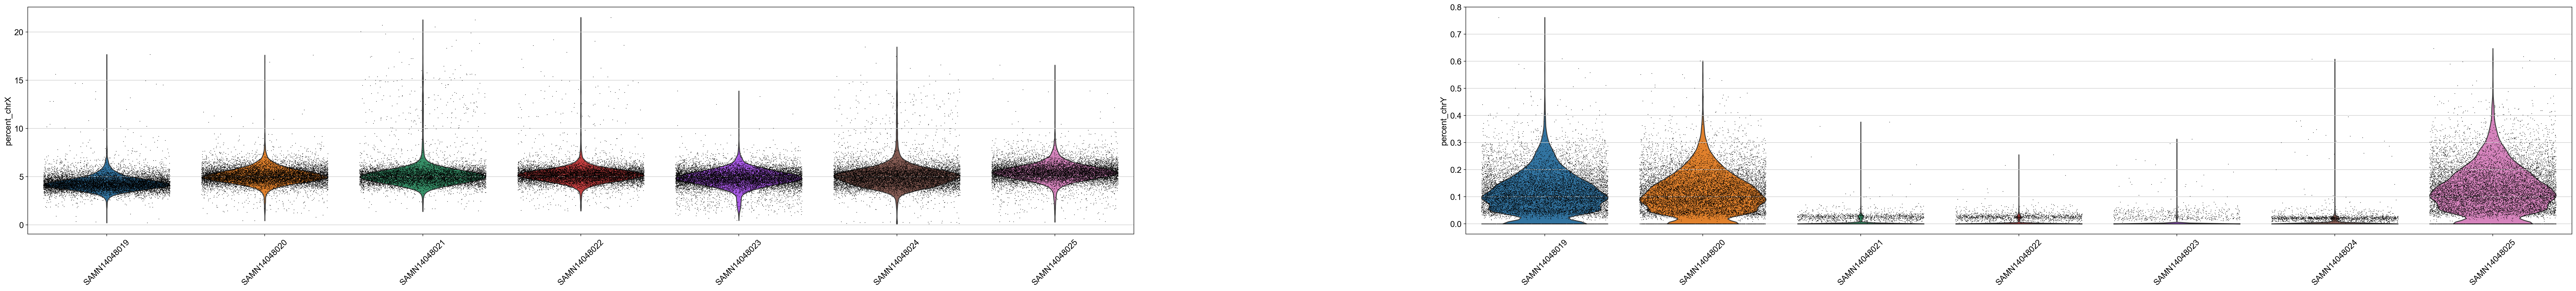

In [61]:
sc.set_figure_params(figsize=(25, 7),dpi=100)
sc.pl.violin(sample_object, ["percent_chrX", "percent_chrY"], jitter = 0.4, groupby = 'donor', rotation = 45)

### Cell cycle scores

In [62]:
!if [ ! -f /Users/mairi.mcclean/data/qc_files/cell_cycle_gene.txt ]; then curl -o /Users/mairi.mcclean/data/qc_files/cell_cycle_gene.txt https://raw.githubusercontent.

zsh:1: parse error near `https://raw.githubus...'


In [63]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/cell_cycle_gene.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
94


In [64]:
# create other anndata object for score calculation

adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['SPRR3', 'S100A9', 'S100A8', 'RGS18', 'G0S2', 'TMSB10', 'IGKC', 'JCHAIN', 'CXCL8', 'PPBP', 'SPP1', '7SK-4', 'ACTB', 'NAMPT', 'HBB', 'HBD', 'FTH1', 'MALAT1', 'LYZ', 'IGHA2', 'IGHG4', 'IGHG2', 'IGHA1', 'IGHG1', 'IGHG3', 'IGHM', 'B2M', 'HBA2', 'HBA1', 'MT2A', 'MT1X', 'CCL4L2', 'H3-3B', 'FTL', 'IGLL5', 'IGLC2', 'IGLC3', 'IGLC7', 'TMSB4X', 'SAT1', 'TIMP1', 'MT-RNR1', 'MT-RNR2', 'MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4']
    finished (0:00:00)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    644 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    729 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


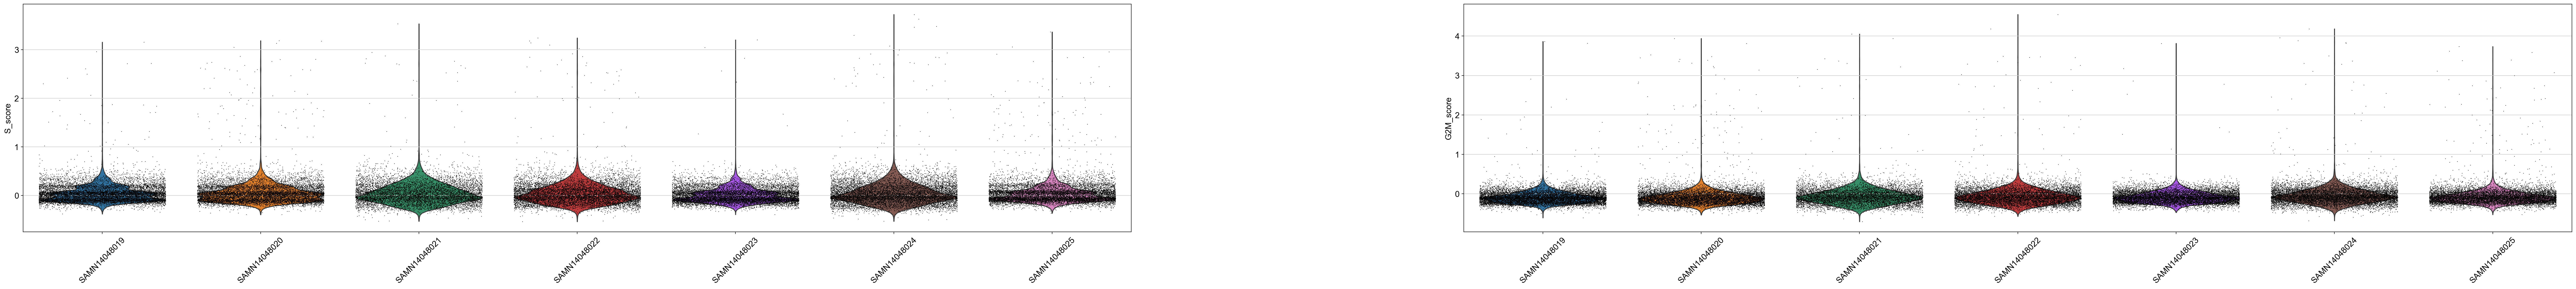

In [65]:

sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'donor', rotation = 45)

In [66]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 73146 × 36039
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_chrY', 'percent_chrX', 'S_score', 'G2M_score'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'status_colors', 'donor_colors'

### Predict doublets

In [67]:
import scrublet

In [68]:
scrub = scrublet.Scrublet(sample_object.X)

Preprocessing...


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:254: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.16
Detected doublet rate = 11.2%
Estimated detectable doublet fraction = 74.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 15.0%
Elapsed time: 120.1 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

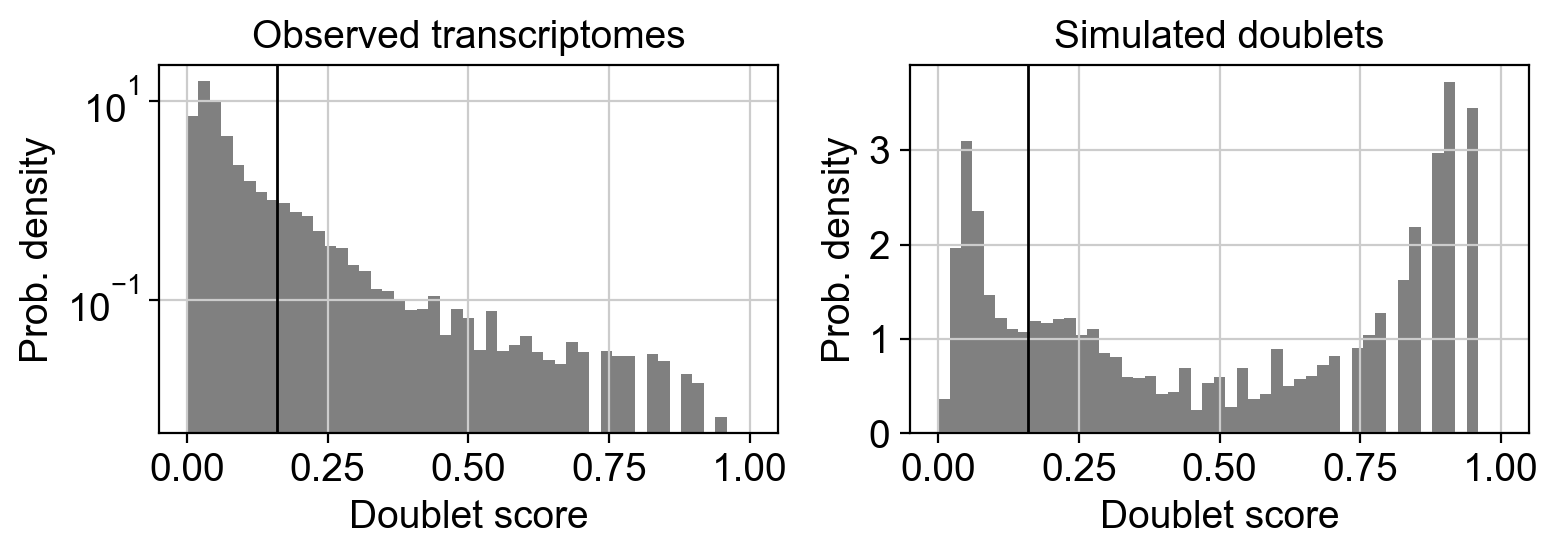

In [69]:
sample_object.obs['doublet_scores'], sample_object.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

In [70]:
sum(sample_object.obs['predicted_doublets'])

8159

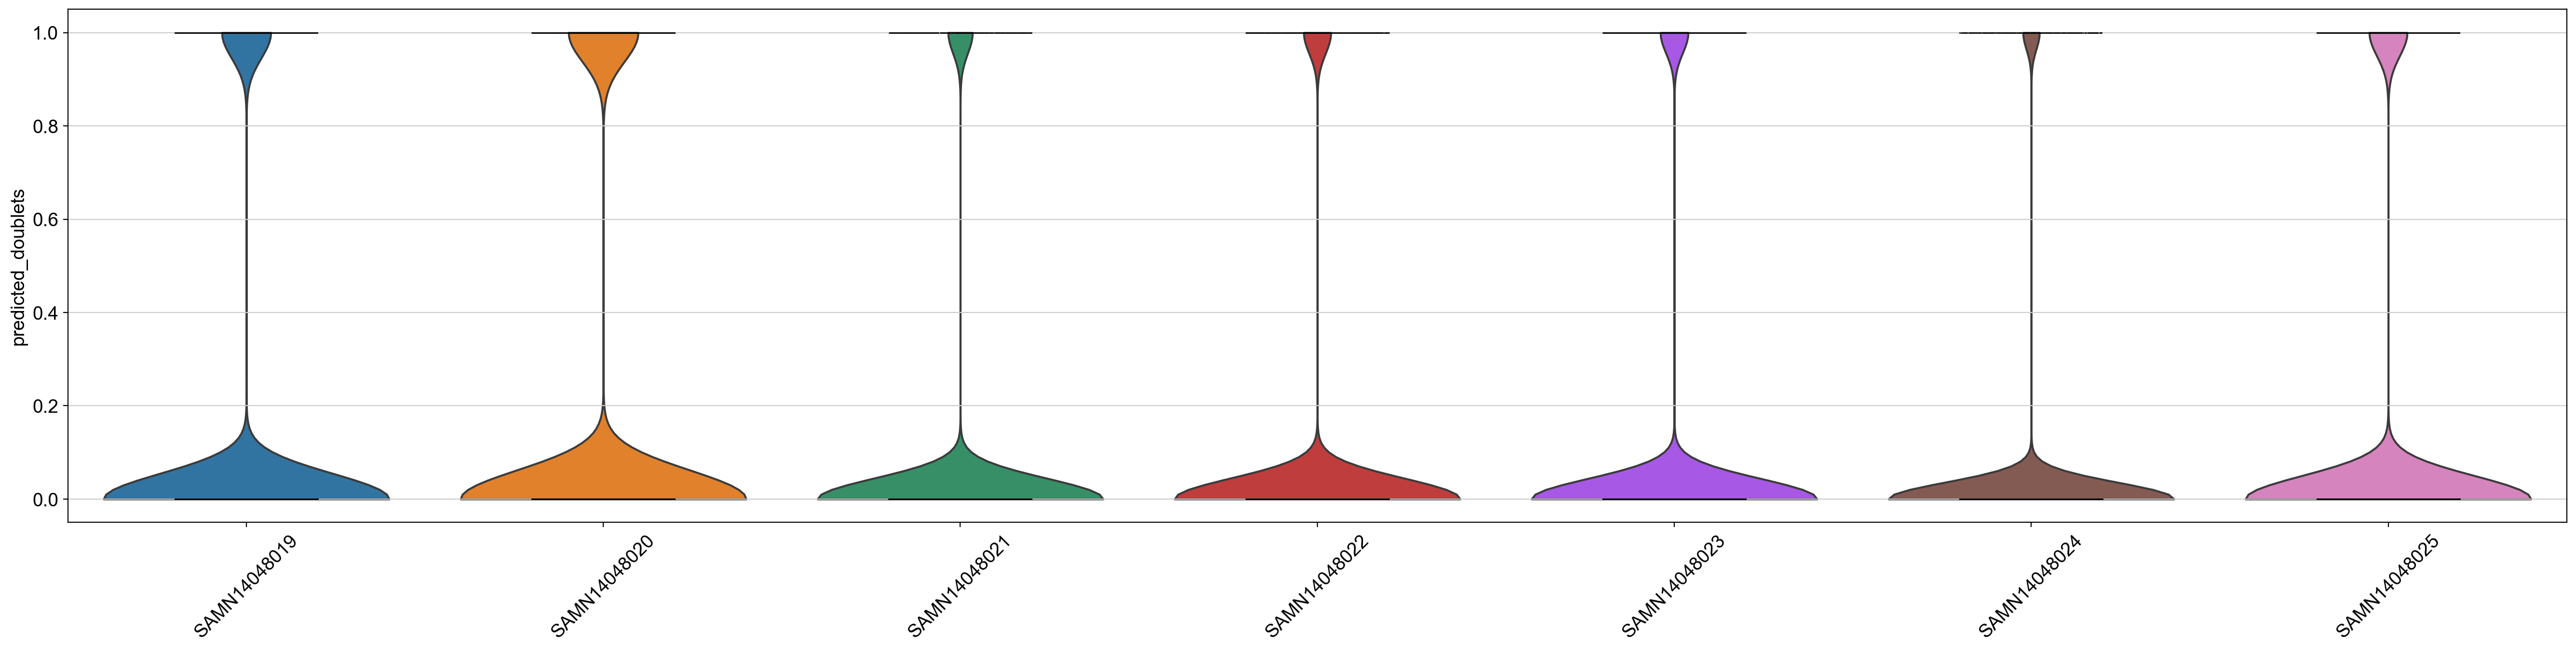

In [71]:
#check if our predicted doublets also have more detected genes in general

sc.pl.violin(sample_object, ['predicted_doublets'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

### Prepare counts for individual slots

In [72]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 73146 × 36039
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_chrY', 'percent_chrX', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'status_colors', 'donor_colors'
    layers: 'counts', 'sqrt_norm'

### Export object

In [73]:
# sample_object.write('/Volumes/Expansion/data_lake/processed_files/qc_objects/human/cai2020/cai2020_scrna_PBMC_mm_230306_qcd.h5ad')

sample_object.write('/Users/mairi.mcclean/example_data_lake/processed_files/qc_plus_objects/human/cai2020/cai2020_scrna_PBMC_mm_230306_qcd.h5ad')